In [2]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import numpy as np
import torch
import torch.nn.functional as F

In [36]:
def loss_fn(output, truth):
    loss_aa = F.smooth_l1_loss(output, truth)
    return loss_aa

# fft plot

# data set
取出一部分数据 来实验和画图

In [2]:
# import torch
# from model import WaveNet
import torch
import matplotlib.pyplot as plt
from datasets_bss import train_dataset, test_dataset
from torch.utils.data import DataLoader, RandomSampler

seed = torch.manual_seed(1001)
train_sampler = RandomSampler(train_dataset(), replacement=False, num_samples=100)
test_sampler = RandomSampler(test_dataset(), replacement=False, num_samples=100)
train_loader = DataLoader(train_dataset(), batch_size=20, sampler=train_sampler)
test_loader = DataLoader(test_dataset(), batch_size=20, shuffle=test_sampler)

train_data, train_truth = next(iter(train_loader))
test_data, test_truth = next(iter(test_loader))

randint = torch.randint(0, 20, (1,))
train_data = train_data.squeeze(1)[randint].to(torch.float32).squeeze(0)  # 
print(train_data.shape)
train_truth = train_truth.squeeze(1)[randint].to(torch.float32).squeeze(0)
print(train_truth.shape)

test_data = test_data.squeeze(1)[randint].to(torch.float32)
test_truth = test_truth.squeeze(1)[randint].to(torch.float32)

torch.Size([1, 512])
torch.Size([3, 512])


In [ ]:
# temp
import matplotlib.pyplot as plt

plt.plot(train_data)

fig, axs = plt.subplots(ncols=1, nrows=3)


# ICA

tensor(0.3300)


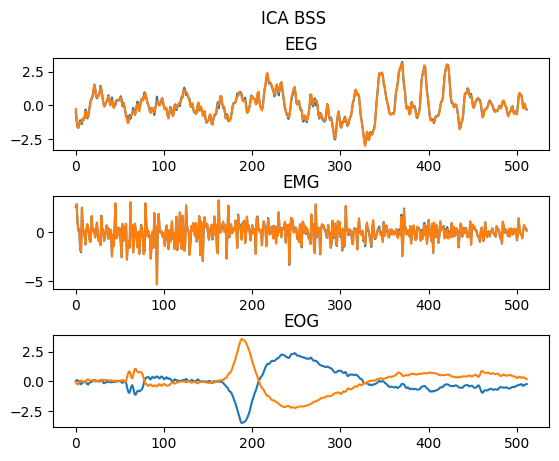

In [43]:
from utils import ICA_
import random
from sklearn.decomposition import PCA, FastICA

def get_random():
    a = random.randint(5, 15)
    b = random.randint(5, 15)
    while a == b:
        b = random.randint(5, 15)
    c = random.randint(5, 15)
    while a == c or b == c:
        c = random.randint(5, 15)
    return a, b, c

def random_data_for_ica(data):  # 一条DATA， 只能取形状
    line1 = data[0]
    line2 = data[1]
    line3 = data[2]
    a, b, c = get_random()
    line1 = line1[None, ...] * a / 10.
    line2 = line2[None, ...] * b / 10.
    line3 = line3[None, ...] * c / 10.
    another_data = line1 + line2 + line3
    return another_data

def ICA_(data):
    components = 3
    data = np.array(data).T
    ica = FastICA(n_components=components)
    S_ = ica.fit_transform(data)
    return S_  # []

def z_score(data):
    mean = np.mean(data)
    std = np.std(data)

    z = (data - mean) / std
    return z

# ica 只测一组数据就好
get_another = random_data_for_ica(train_truth)
get_another_2 = random_data_for_ica(train_truth)
input_data = np.concatenate((train_data, get_another, get_another_2), axis=0)

# print(input_data.shape)
# ica_ = ICA_(input_data).T

# print(ica_.shape)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, ncols=1)
plt.subplots_adjust(hspace=0.5)
axs[0].plot(z_score(ica_[0]))
axs[0].set_title('EEG')
axs[1].plot(z_score(ica_[1]))
axs[1].set_title('EMG')
axs[2].plot(z_score(ica_[2]))
axs[2].set_title('EOG')

# fig, axs = plt.subplots(nrows=3, ncols=1)
axs[0].plot(train_truth[0])
axs[1].plot(train_truth[1])
axs[2].plot(train_truth[2])

plt.suptitle('ICA BSS')

output = torch.tensor(np.concatenate((z_score(ica_[0]), z_score(ica_[1]), z_score(ica_[2])), axis=0)[None,...])
truth = torch.tensor(np.concatenate((train_truth[0],train_truth[1],train_truth[2]),axis=0)[None, ...])

loss = loss_fn(output, truth)
print(loss)

# hijack_DiffWave

# hijack_GAU

# 统计结果 t test

In [3]:
import numpy as np
from scipy.stats import t, ttest_ind

# 两组样本数据，
data1 = np.array([1, 2, 3, 4, 5])
data2 = np.array([4, 5, 6, 7, 8])

# 使用ttest_ind进行独立样本t检验
result = ttest_ind(data1, data2)

t_value = result.statistic
p_value = result.pvalue
# p值小于0.05，拒绝原假设，说明两样本均值显著不同

# 用于检验 hijack和end to end两组结果

In [ ]:
# BSS plot
